In [5]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statistics import mean


In [6]:
# load data
with open("../Data/Selectivity_validation.xlsx", 'rb') as f:
    data = pd.read_excel(f)

# Get variant labels and fold-change values for the S1 template
x = data["Name"]
yS = data["Fold-change_S"]
yR = data["Fold-change_R"]

#get labels
l = [i[:-2] for i in list(x)]
labels = list(set(l))

#process data via a dictionary
data_dict = {}
for i in range(0,len(x)):
    l = x[i][:-2]
    if l not in data_dict:
        data_dict[l] = {"S": [yS[i]], "R": [yR[i]]}
    else:
        data_dict[l]["S"].append(yS[i])
        data_dict[l]["R"].append(yR[i])
#calculate averages
for i in data_dict.keys():
    data_dict[i]["avgS"] = mean(data_dict[i]["S"])
    data_dict[i]["avgR"] = mean(data_dict[i]["R"])

print(data_dict)

# title = "R1 pScreenS3"

#plot_secondary_screen(x,y, WT, title)

{'IR02': {'S': [np.float64(20.57552907), np.float64(21.89786732), np.float64(23.28917883)], 'R': [np.float64(1.07540234), np.float64(1.147938576), np.float64(1.114682688)], 'avgS': np.float64(21.920858406666667), 'avgR': np.float64(1.1126745346666667)}, 'IR02_mut1': {'S': [np.float64(1.298597991), np.float64(1.357716536), np.float64(1.579245488)], 'R': [np.float64(0.622973913), np.float64(0.5920475526), np.float64(0.4500366323)], 'avgS': np.float64(1.4118533383333334), 'avgR': np.float64(0.5550193659666667)}, 'IR02_mut2': {'S': [np.float64(1.395758756), np.float64(1.398719547), np.float64(1.576247347)], 'R': [np.float64(0.6372644835), np.float64(0.6255050527), np.float64(0.7230258201)], 'avgS': np.float64(1.45690855), 'avgR': np.float64(0.6619317854333333)}, 'IR35': {'S': [np.float64(26.48396898), np.float64(28.48134443), np.float64(33.13887906)], 'R': [np.float64(1.53082288), np.float64(1.640018913), np.float64(1.198394476)], 'avgS': np.float64(29.368064156666666), 'avgR': np.float64(

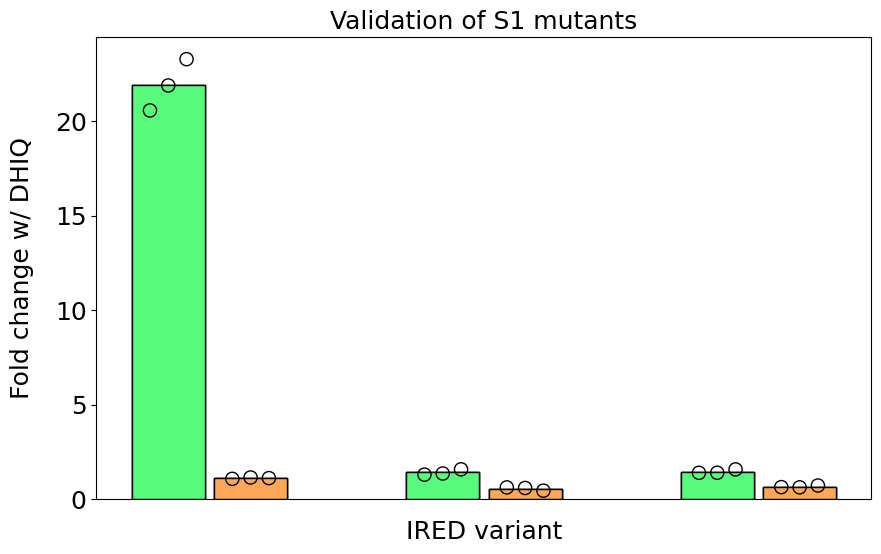

In [7]:
#create S1 plots
fig, ax = plt.subplots(figsize=(10, 6))

# IRED variants
IREDs = ["IR02", "IR02_mut1", "IR02_mut2"]
data_dictS1 = {key: data_dict[key] for key in IREDs if key in data_dict}

# The x locations for the groups
x = np.arange(3)*3

# Width of each bar
bar_width = 0.5

# Plot bars for each group
avgS = [i["avgS"] for i in data_dictS1.values()]
avgR = [i["avgR"] for i in data_dictS1.values()]
offset = [-0.2, 0, 0.2]

for i in range(0,len(IREDs)):
    plt.bar(x, avgS, color="#58fc7c", edgecolor="black")
    c = 0
    for k in data_dictS1[IREDs[i]]["S"]:
        plt.scatter(x[i]+offset[c], k, edgecolor="#000000", color="None", s=90, zorder=20)
        c += 1
    plt.bar(x+0.9, avgR, color="#fca858", edgecolor="black")
    c = 0
    for k in data_dictS1[IREDs[i]]["R"]:
        plt.scatter(x[i]+0.9+offset[c], k, edgecolor="#000000", color="None", s=90, zorder=20)
        c += 1


plt.title("Validation of S1 mutants", fontsize=18)
plt.xlabel("IRED variant", fontsize=18, labelpad=15)
plt.ylabel("Fold change w/ DHIQ", fontsize=18, labelpad=15)
plt.yticks(size=18)
plt.xticks([])
# plt.savefig("SVG/S1_mutant_validation.svg", format="svg")
plt.show()


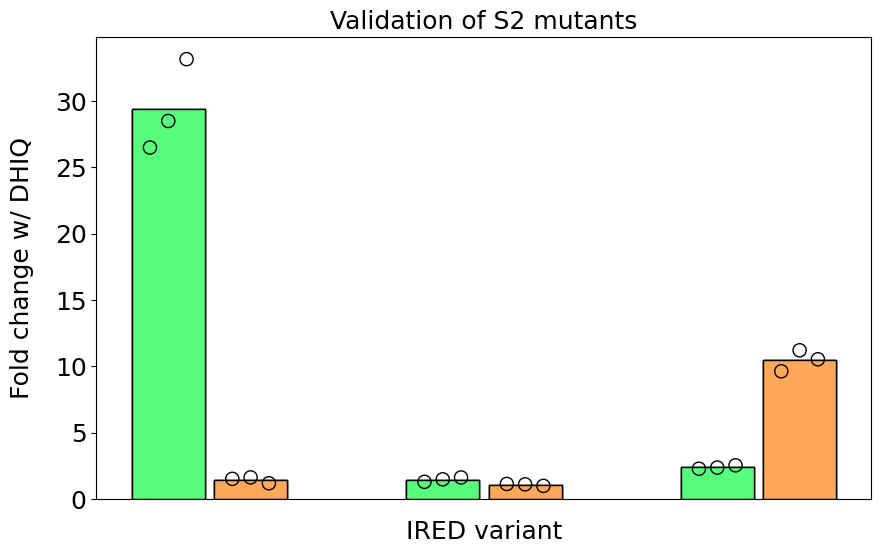

In [8]:
#create plots
fig, ax = plt.subplots(figsize=(10, 6))

# IRED variants
IREDs = ["IR35", "IR35_mut1", "IR35_mut2"]
data_dictS2 = {key: data_dict[key] for key in IREDs if key in data_dict}

# The x locations for the groups
x = np.arange(3)*3

# Width of each bar
bar_width = 0.5

# Plot bars for each group
avgS = [i["avgS"] for i in data_dictS2.values()]
avgR = [i["avgR"] for i in data_dictS2.values()]
offset = [-0.2, 0, 0.2]

for i in range(0,len(IREDs)):
    plt.bar(x, avgS, color="#58fc7c", edgecolor="black")
    c = 0
    for k in data_dictS2[IREDs[i]]["S"]:
        plt.scatter(x[i]+offset[c], k, edgecolor="#000000", color="None", s=90, zorder=20)
        c += 1
    plt.bar(x+0.9, avgR, color="#fca858", edgecolor="black")
    c = 0
    for k in data_dictS2[IREDs[i]]["R"]:
        plt.scatter(x[i]+0.9+offset[c], k, edgecolor="#000000", color="None", s=90, zorder=20)
        c += 1


plt.title("Validation of S2 mutants", fontsize=18)
plt.xlabel("IRED variant", fontsize=18, labelpad=15)
plt.ylabel("Fold change w/ DHIQ", fontsize=18, labelpad=15)
plt.yticks(size=18)
plt.xticks([])
# plt.savefig("SVG/S2_mutant_validation.svg", format="svg")
plt.show()